In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv(r"C:\Users\PRIYANSHI\Desktop\Priyanshi\college\sem4\Data Mining\AQI_CODE_FILES\3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv")

In [3]:
n_row,n_col=data.shape
print("The data has {} rows {} cols.".format(n_row,n_col))

The data has 3175 rows 11 cols.


In [4]:
data.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3175.000000,3175.000000,2942.000000,2942.000000,2942.000000
mean,22.972670,78.478878,24.691027,73.232835,42.545887
std,5.316370,4.834576,27.483742,78.208815,43.191032
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.113505,75.467934,6.000000,19.000000,12.000000
50%,23.685297,77.271255,15.000000,50.000000,29.000000
75%,27.554793,80.290900,34.000000,99.000000,58.000000
max,31.620000,94.636574,245.000000,500.000000,338.000000


In [5]:
data.isna().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    233
pollutant_max    233
pollutant_avg    233
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isna().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [7]:
data.drop(data[data['pollutant_id']!='PM2.5'].index,inplace=True)

In [8]:
data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",21-04-2024 12:00:00,16.987287,81.736318,PM2.5,5.0,40.0,22.0
6,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",21-04-2024 12:00:00,13.670000,79.350000,PM2.5,50.0,80.0,62.0
11,India,Assam,Guwahati,"IITG, Guwahati - PCBA",21-04-2024 12:00:00,26.202864,91.700464,PM2.5,19.0,55.0,40.0
17,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",21-04-2024 12:00:00,26.181742,91.780630,PM2.5,1.0,58.0,24.0
24,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-04-2024 12:00:00,26.803650,84.519540,PM2.5,110.0,500.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...
3158,India,West_Bengal,Haldia,"Priyambada Housing Estate, Haldia - WBPCB",21-04-2024 12:00:00,22.060470,88.109737,PM2.5,15.0,48.0,25.0
3161,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",21-04-2024 12:00:00,22.629801,88.352017,PM2.5,31.0,91.0,55.0
3163,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",21-04-2024 12:00:00,22.611968,88.347422,PM2.5,35.0,320.0,105.0
3166,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",21-04-2024 12:00:00,22.568732,88.279728,PM2.5,30.0,88.0,62.0


In [9]:
df = data.groupby(['city', 'pollutant_id']).agg({'pollutant_min': 'min', 'pollutant_max': 'min'})
df['pollutant_avg'] = (df['pollutant_max'] + df['pollutant_min']) / 2

In [10]:
df

,,pollutant_min,pollutant_max,pollutant_avg
city,pollutant_id,,,
Agartala,PM2.5,34.0,135.0,84.5
Agra,PM2.5,3.0,49.0,26.0
Ahmedabad,PM2.5,18.0,78.0,48.0
Ahmednagar,PM2.5,34.0,238.0,136.0
Aizawl,PM2.5,23.0,40.0,31.5
...,...,...,...,...
Vijayawada,PM2.5,37.0,53.0,45.0
Visakhapatnam,PM2.5,27.0,92.0,59.5
Vrindavan,PM2.5,25.0,98.0,61.5


In [11]:
df['pollutant_min'].unique()

array([ 34.,   3.,  18.,  23.,  28.,  32.,  42.,  26.,  82.,  25., 100.,
        15., 108.,  19.,  37.,  10.,  22.,  76.,  14.,  78.,   4.,  72.,
         7.,   8.,  58.,   6., 110.,  71.,   9.,  31.,  63.,  17.,  35.,
        29.,   2.,  30.,  24.,  60.,  85.,  39.,  55.,  20.,  33.,  41.,
         1.,  68.,  52.,  88.,  36.,  16.,  12.,  38.,  27.,  11.,  13.,
        21.,  56.,  66.,  59.,  50.,  62.,  77.,  49.,  98.,  87.,  74.,
        48.,  75.,  57.,  43., 101.,  64.,   5.,  40., 112.,  86.,  45.])

In [12]:
df['pollutant_max'].unique()

array([135.,  49.,  78., 238.,  40.,  63.,  81.,  70.,  65.,  86.,  74.,
        98.,  46., 325.,  69.,  75., 307., 345., 168.,  37., 193., 108.,
       153., 223.,  68., 368.,  13., 322.,  34., 134.,  72.,  54.,  71.,
       500., 180., 334.,  79., 107.,  92.,  53., 160.,  90., 453.,  47.,
       296., 192.,  36., 300.,  42., 100., 232.,  21.,  88., 163.,  95.,
       183.,  76.,  77.,  82., 187.,  89.,  84., 235., 230., 327.,  52.,
        48.,  31., 104., 255., 330.,  55., 116.,  60.,  66.,  27.,  39.,
        43.,  96.,  62., 333.,  41., 169.,  97.,  87., 301.,  91., 215.,
        85., 173.,  73.,  61., 138., 216., 400., 261.,  58., 143., 329.,
       178., 364.,  83., 372., 112.,  59., 267.,  51., 147., 123., 196.,
       172., 162., 228.,  67.,  28.,  50., 227., 141., 127.,  38., 113.,
        56., 421.,  30.,  15., 305., 306.,  80., 177., 133.,  99.])

In [13]:
df['pollutant_avg'].unique()

array([ 84.5,  26. ,  48. , 136. ,  31.5,  45.5,  54.5,  51. ,  34. ,
        52. ,  58. ,  36. , 203.5,  51.5,  50. , 180. , 138. ,  28. ,
       115. ,  59. ,  87.5, 149.5, 223. ,   8.5, 197. ,  20.5,  76.5,
        40. ,  83. ,  36.5,  38.5, 305. , 108.5, 202.5,  44. ,  69. ,
        60. ,  77.5,  35. ,  84. , 244. ,  28.5, 162.5,  98. ,  19. ,
       165. ,  33. ,  65. ,  80. , 158.5,  22.5,  11.5,  63.5, 124. ,
        75. ,  93. ,  45. ,  48.5,  62.5,  90. ,  49.5, 110. ,  35.5,
        42.5, 151.5,  61. , 141. , 207.5,  57. ,  56.5,  25. ,  41.5,
        64. , 145.5,  64.5, 176.5,  32. ,  74.5, 178.5,  63. ,  67. ,
        81.5,  46.5,  39.5,  42. ,  23.5,  76. ,  32.5, 172.5,  46. ,
        72. ,  99. ,  47.5,  70.5,  66. , 189.5, 128. ,  55. , 117.5,
       134.5,  41. ,  24. , 112.5,  27.5, 157. , 243.5,  49. ,  47. ,
       167.5,  60.5,  88. ,  18.5, 202. , 207. ,  72.5,  24.5, 211. ,
       184. ,  39. ,  85.5,  89. , 113.5, 107.5, 122. ,  15. ,  21.5,
       141.5,  53.5,

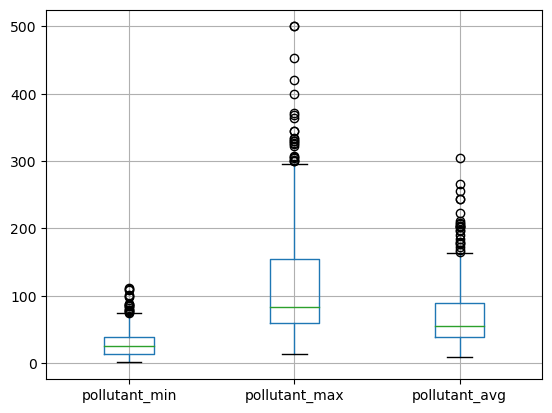

In [14]:
num_col = df.select_dtypes(include=['float64', 'int64']).columns
boxplot = df.boxplot()

In [15]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    if outlier_mask.any():
        df = df[~outlier_mask] 
        print("Column '{}' has outliers.".format(col))

Column 'pollutant_min' has outliers.
Column 'pollutant_max' has outliers.
Column 'pollutant_avg' has outliers.


In [16]:
bins = [0, 50, 100, 250, 350, np.inf]
categories = ['very healthy', 'healthy', 'moderate', 'unhealthy', 'very unhealthy']

In [17]:
df['pollutant_level'] = pd.cut(df['pollutant_avg'], bins=bins, labels=categories, right=False)

In [18]:
df

,,pollutant_min,pollutant_max,pollutant_avg,pollutant_level
city,pollutant_id,,,,
Agartala,PM2.5,34.0,135.0,84.5,healthy
Agra,PM2.5,3.0,49.0,26.0,very healthy
Ahmedabad,PM2.5,18.0,78.0,48.0,very healthy
Aizawl,PM2.5,23.0,40.0,31.5,very healthy
Ajmer,PM2.5,28.0,63.0,45.5,very healthy
...,...,...,...,...,...
Vijayawada,PM2.5,37.0,53.0,45.0,very healthy
Visakhapatnam,PM2.5,27.0,92.0,59.5,healthy
Vrindavan,PM2.5,25.0,98.0,61.5,healthy


In [19]:
X = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']]
y = df['pollutant_level']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


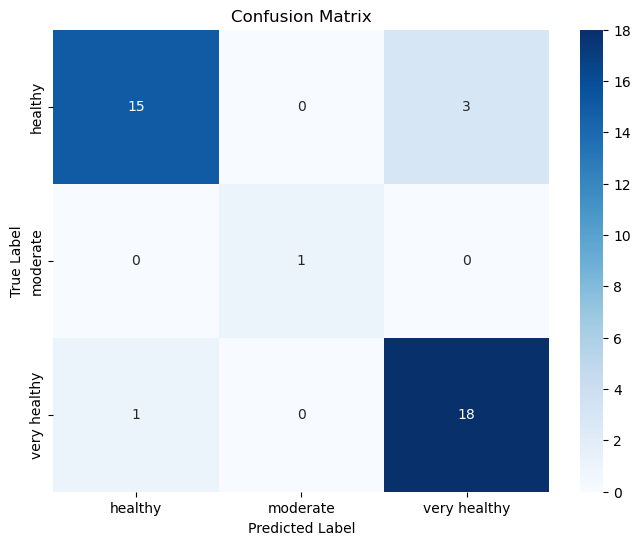

In [21]:
classes = np.unique(np.concatenate((y_test, y_pred)))

conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)

conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()